In [1]:
!pwd
import sys
sys.executable

/c/Users/shingo/jupyter_notebook/tf_2_work/statsmodels_work


'C:\\Users\\shingo\\Anaconda3\\envs\\tfgpu20\\python.exe'

# 【統計モデリング入門 】一般化線形モデル（GLM）を基礎から学ぶ -Pythonによる実践あり-
- https://cpp-learning.com/glm/

<br>

## 一般線形モデル: y=a1x1+a2x2+…+bの関数で予測するモデル
#### 一般線形回帰モデルでは、正解と予測の誤差の傾向には正規分布（normal distribution）が仮定されている
- 単回帰（線形回帰）分析: y=ax+bの直線の関数（モデル）で連続値yを予測する分析
- 重回帰分析: y=a1x1+a2x2+…+bの関数（モデル）で連続値yを予測する分析
- t検定: 2群の母平均の差の検定（差があるのは偶然ではないかを決める検定）
- 分散分析（ANOVA）: 3群以上の検定
- も一般線形モデルで表せる
- http://cogpsy.educ.kyoto-u.ac.jp/personal/Kusumi/datasem13/shrasuna1.pdf

<br>

## 一般化線形モデル(generalized liner model; GLM): 正規分布以外の、指数型分布族(exponential family)の分布を仮定したモデル
#### 一般化線形モデルは確率分布とlink関数（式を変換して線形にする関数。分布によってlink関数は大体決まっている）が必要
- ロジスティック回帰モデル（logistic regression model）: 正解と予測の誤差の傾向に二項分布（binomial distribution）を仮定したモデル
- ポアソン回帰モデル（Poisson regression model）:出力ラベルyの分布に対してポアソン分布（Poisson distribution）を利用したモデル
- https://www.bigdata-navi.com/aidrops/2925/
- http://cogpsy.educ.kyoto-u.ac.jp/personal/Kusumi/datasem13/shrasuna1.pdf

In [2]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
df = sns.load_dataset('tips')
display(df.head(3))
print(df.info())
display(df.describe(include='all'))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [12]:
df.pivot_table(values='tip', index=['sex', 'smoker'], columns=['day', 'time'], aggfunc='count')
# df.melt(id_vars=['total_bill'])

day            Thur          Fri           Sat    Sun
time          Lunch Dinner Lunch Dinner Dinner Dinner
sex    smoker                                        
Male   Yes     10.0    NaN   3.0    5.0   27.0   15.0
       No      20.0    NaN   NaN    2.0   32.0   43.0
Female Yes      7.0    NaN   3.0    4.0   15.0    4.0
       No      24.0    1.0   1.0    1.0   13.0   14.0

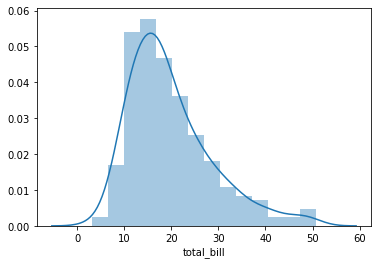

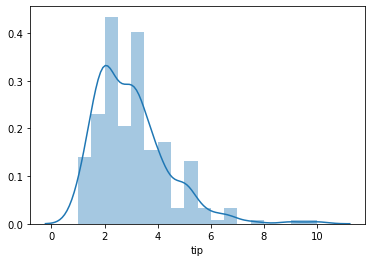

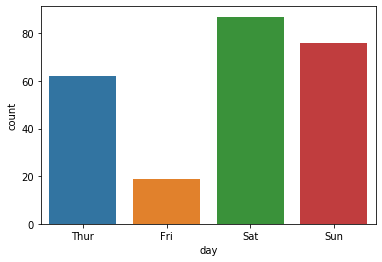

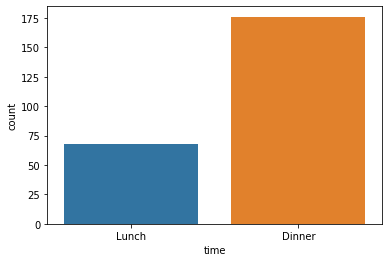

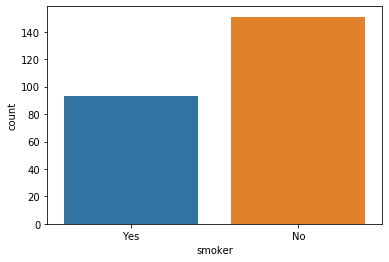

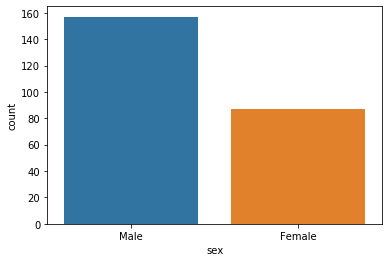

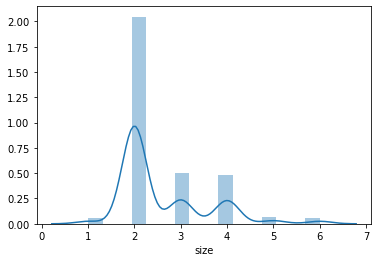

In [20]:
sns.distplot(df['total_bill'])
plt.show()

sns.distplot(df['tip'])
plt.show()

sns.countplot(df['day'])
plt.show()

sns.countplot(df['time'])
plt.show()

sns.countplot(df['smoker'])
plt.show()

sns.countplot(df['sex'])
plt.show()

sns.distplot(df['size'])
plt.show()

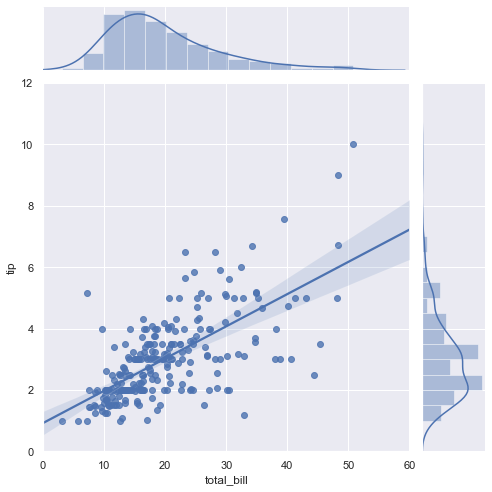

In [23]:
# 会計総額とチップのデータを可視化
sns.set(style="darkgrid")
sns.jointplot(x="total_bill", y="tip", data=df,
              kind='reg',
              xlim=(0, 60), ylim=(0, 12),
              color="b",
              height=7);

## # 実践！統計モデリング基礎 -線形モデル編-
- 普通の線形回帰をstatsmodelsでやる

In [24]:
# 線形予測子・確率分布・リンク関数の推定
y = df['tip']          # 目的変数：y
x = df['total_bill']   # 説明変数：x（線形予測子：wx）
link = sm.families.links.identity()  # リンク関数：恒等リンク関数
family = sm.families.Gaussian(link)  # 確率分布：ガウス分布

In [25]:
# 統計モデリングでは、真の確率分布にあてはまりの良いモデルを「推論」する工程が、機械学習モデリングでいう「学習」に相当
# model
model = sm.GLM(y, x, family=family)
results = model.fit()
print(results.summary())  # 説明変数x（total_bill） にかかる 重みが w=0.1437

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    tip   No. Observations:                  244
Model:                            GLM   Df Residuals:                      243
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                          1.1830
Method:                          IRLS   Log-Likelihood:                -366.22
Date:                Thu, 07 May 2020   Deviance:                       287.46
Time:                        22:50:14   Pearson chi2:                     287.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.1437      0.003     44.771      0.0

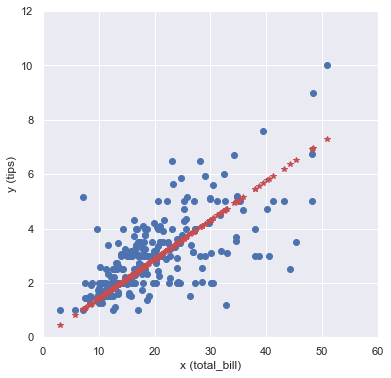

In [26]:
# 予測結果の可視化
# 重み
w = results.params[0]  # 0.1437
 
# フィッティング直線
# y_hat = results.predict(x)
y_hat =  w * x
 
# 可視化
fig = plt.figure(figsize=(6.0, 6.0))
plt.plot(x, y, "o")
plt.plot(x, y_hat, "*", color="r")
plt.xlabel('x (total_bill)'), plt.ylabel('y (tips)')
plt.xlim(0, 60), plt.ylim(0, 12)
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    tip   No. Observations:                  244
Model:                            GLM   Df Residuals:                      242
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          1.0446
Method:                          IRLS   Log-Likelihood:                -350.54
Date:                Thu, 07 May 2020   Deviance:                       252.79
Time:                        22:53:08   Pearson chi2:                     253.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

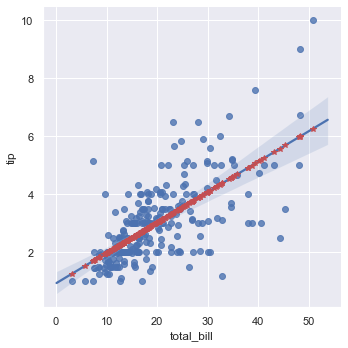

In [29]:
# statsmodelsでは sm.add_constant(x) とすれば、切片のあるモデルになります。
# model 切片あり
model = sm.GLM(y, sm.add_constant(x), family=family)
results = model.fit()
print(results.summary())

# 重み
w0 = results.params[0]  # 0.9203
w1 = results.params[1]  # 0.1050

# フィッティング直線
y_hat =  w0 + w1 * x
# y_hat = results.predict(x)

# 可視化
sns.lmplot(x="total_bill", y="tip", data=df);
plt.plot(x, y_hat, "*", color="r")  # これで切片のあるモデルになりました。ただし、total_bill=0なのにtip≠0って不自然

In [31]:
# モデル保存
results.save("./test.pkl")

# モデルロード
test_model = sm.load("./test.pkl")
print(test_model.params)

const         0.920270
total_bill    0.105025
dtype: float64


## 実践！統計モデリング応用 -一般化線形モデル編-

In [32]:
# 元データをコピー
df_dummy = df.copy()

# ダミー変数に変更
df_dummy['sex'] = pd.get_dummies(df_dummy['sex'])  # Female=0, male=1
df_dummy['time'] = pd.get_dummies(df_dummy['time'])  # Dinner=0, Lunch=1
df_dummy['smoker'] = df_dummy['smoker'].map({'No': 0, 'Yes': 1})  # No=0, Yes=1
df_dummy['smoker'] = df_dummy['smoker'].astype('uint8')  #  dtype: category 変換 dtype: uint8

df_dummy.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,0,2
1,10.34,1.66,1,0,Sun,0,3
2,21.01,3.50,1,0,Sun,0,3


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    tip   No. Observations:                  244
Model:                            GLM   Df Residuals:                      240
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          1.1558
Method:                          IRLS   Log-Likelihood:                -361.87
Date:                Thu, 07 May 2020   Deviance:                       277.40
Time:                        23:02:21   Pearson chi2:                     277.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.1331      0.006     24.149      0.0

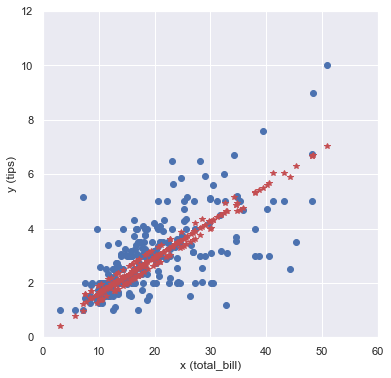

In [35]:
# 線形予測子を変更（説明変数を増やす）
Yd = df_dummy['tip']          # 目的変数
# Xd = df_dummy[['total_bill', 'smoker']]   # 説明変数のx1とx2（線形予測子：w1x1 + w2x2）
Xd = df_dummy[['total_bill', 'smoker', 'sex', 'time']]   # 説明変数4つ
link = sm.families.links.identity()  # 恒等リンク関数
family = sm.families.Gaussian(link)  # ガウス分布

# model
model = sm.GLM(Yd, Xd, family=family)
results = model.fit()
print(results.summary())

# 重み
# w1 = results.params[0]  # 0.143077
# w2 = results.params[1]  # 0.038961

# フィッティング直線
y_hat = results.predict(Xd)
print(y_hat)

# 可視化
fig = plt.figure(figsize=(6.0, 6.0))
plt.plot(Xd['total_bill'], Yd, "o")
plt.plot(Xd['total_bill'], y_hat, "*", color="r")
plt.xlabel('x (total_bill)'), plt.ylabel('y (tips)')
plt.xlim(0, 60), plt.ylim(0, 12)
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    tip   No. Observations:                  244
Model:                            GLM   Df Residuals:                      242
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -405.92
Date:                Thu, 07 May 2020   Deviance:                       102.54
Time:                        23:04:39   Pearson chi2:                     111.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.0460      0.002     24.942      0.0

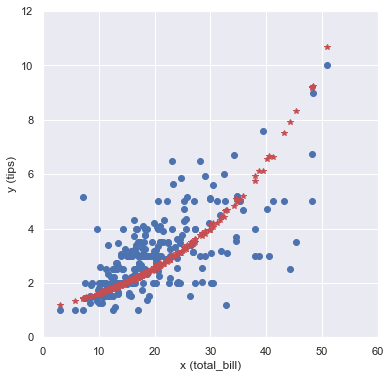

In [38]:
# 確率分布とリンク関数も変更
Yd = df_dummy['tip']
Xd = df_dummy[['total_bill', 'smoker']]
link = sm.families.links.log()   # 対数リンク関数
family = sm.families.Poisson(link)  # ポアソン分布

# model
model = sm.GLM(Yd, Xd, family=family)
results = model.fit()
print(results.summary())

# フィッティング直線
y_hat = results.predict(Xd)

# 可視化
fig = plt.figure(figsize=(6.0, 6.0))
plt.plot(Xd['total_bill'], Yd, "o")
plt.plot(Xd['total_bill'], y_hat, "*", color="r")
plt.xlabel('x (total_bill)'), plt.ylabel('y (tips)')
plt.xlim(0, 60), plt.ylim(0, 12)
plt.show()

## まとめ
### 【機械学習モデリング】
- 交差検証などでモデル出力結果を評価し、ハイパーパラメータチューニングをすることで未知のデータに対しても精度の良い推論ができるモデルを設計する
- ※TrainデータとTestデータで確率分布に偏りがあると適切な評価ができない

<br>

### 【統計モデリング】
- サンプルの確率分布から真の確率分布を推定し、その推定を考慮したモデル設計により、未知のデータに対しても真の確率分布に”あてはめた”推論ができる
- ※統計モデルでは「あてはまりの良さ」を評価することが重要